In [1]:
file <- "E:/Homework/IS/out_data/model_data/model_data.csv"
data <- read.csv(file, header = TRUE, sep = ",", stringsAsFactors = TRUE)

In [2]:
summary(data)

 ConvertedCompYearly
 Min.   :  6503     
 1st Qu.: 48000     
 Median : 74963     
 Mean   : 85430     
 3rd Qu.:116829     
 Max.   :230000     
                    
                                                                                 MainBranch   
 I am a developer by profession                                                       :37850  
 I am not primarily a developer, but I write code sometimes as part of my work/studies: 2729  
                                                                                              
                                                                                              
                                                                                              
                                                                                              
                                                                                              
                 Age       
 18-24 years old   : 3874  
 25-34 years old

In [3]:
target <- data$ConvertedCompYearly

In [4]:
t.test(target ~  MainBranch, data = data)


	Welch Two Sample t-test

data:  target by MainBranch
t = 4.0159, df = 3148.4, p-value = 6.06e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2032.743 5911.380
sample estimates:
                                                       mean in group I am a developer by profession 
                                                                                           85696.76 
mean in group I am not primarily a developer, but I write code sometimes as part of my work/studies 
                                                                                           81724.70 


In [5]:
perform_anova_tukey <- function(group_var) {
  # Create the formula using the target and group variables
  formula <- as.formula(paste0("target ~", group_var))
  
  # Perform ANOVA test
  anova_model <- aov(formula, data = data)
  anova_summary <- summary(anova_model)
  
  # Extract the p-value from the ANOVA summary
  p_value <- anova_summary[[1]][["Pr(>F)"]][1]
  
  # Check if the p-value is smaller than 0.05
  if (p_value < 0.05) {
    cat("ANOVA results:\n")
    print(anova_summary)
    
    cat("\nPerforming Tukey's HSD test...\n")
    
    # Perform Tukey's HSD test
    tukey_results <- TukeyHSD(anova_model)
    
    # Print the results
    print(tukey_results)
  } else {
    cat("ANOVA results:\n")
    print(anova_summary)
    
    cat("\nThe p-value is greater than or equal to 0.05. Tukey's HSD test not performed.\n")
  }
}

In [6]:
perform_anova_tukey("Age")

ANOVA results:
               Df    Sum Sq   Mean Sq F value Pr(>F)    
Age             6 9.000e+12 1.500e+12   640.6 <2e-16 ***
Residuals   40572 9.499e+13 2.341e+09                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Performing Tukey's HSD test...
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = formula, data = data)

$Age
                                           diff         lwr        upr
25-34 years old-18-24 years old       24891.471   22377.413  27405.528
35-44 years old-18-24 years old       43642.896   41001.271  46284.521
45-54 years old-18-24 years old       50159.106   46956.098  53362.113
55-64 years old-18-24 years old       56404.544   52042.880  60766.208
65 years or older-18-24 years old     58259.130   48932.207  67586.052
Under 18 years old-18-24 years old   -17296.629  -42620.057   8026.799
35-44 years old-25-34 years old       18751.425   17080.698  20422.152
45-54 years old-25-34 ye

In [7]:
perform_anova_tukey("Employment")

ANOVA results:
               Df    Sum Sq   Mean Sq F value Pr(>F)    
Employment      6 8.017e+11 1.336e+11   52.53 <2e-16 ***
Residuals   40572 1.032e+14 2.543e+09                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Performing Tukey's HSD test...
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = formula, data = data)

$Employment
                                                                                                                                                                             diff
Employed, full-time;Employed, part-time-Employed, full-time                                                                                                           -26816.4315
Employed, full-time;Independent contractor, freelancer, or self-employed-Employed, full-time                                                                            -924.6372
Employed, full-time;Independent contractor, freelan

In [8]:
perform_anova_tukey("RemoteWork")

ANOVA results:
               Df    Sum Sq   Mean Sq F value Pr(>F)    
RemoteWork      2 4.044e+12 2.022e+12   820.8 <2e-16 ***
Residuals   40576 9.995e+13 2.463e+09                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Performing Tukey's HSD test...
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = formula, data = data)

$RemoteWork
                                                    diff       lwr       upr
In-person-Hybrid (some remote, some in-person) -16205.14 -18037.29 -14372.99
Remote-Hybrid (some remote, some in-person)     13542.14  12304.54  14779.75
Remote-In-person                                29747.28  27919.63  31574.93
                                               p adj
In-person-Hybrid (some remote, some in-person)     0
Remote-Hybrid (some remote, some in-person)        0
Remote-In-person                                   0



In [9]:
perform_anova_tukey("EdLevel")

ANOVA results:
               Df    Sum Sq   Mean Sq F value Pr(>F)    
EdLevel         6 8.627e+11 1.438e+11   56.56 <2e-16 ***
Residuals   40572 1.031e+14 2.542e+09                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Performing Tukey's HSD test...
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = formula, data = data)

$EdLevel
                                                                                         diff
Bachelors degree-Associate degree                                                  4884.17107
Masters degree-Associate degree                                                    1633.75210
Primary/elementary school-Associate degree                                        -4316.17666
Professional degree-Associate degree                                               4827.12617
Secondary school-Associate degree                                                -15382.13398
Some college/university 

In [10]:
perform_cor_test_plot <- function(col_var) {
  # Perform the correlation test
  cor_result <- cor.test(target, data[[col_var]], method = "pearson", na.action = na.omit)

  # Extract the correlation coefficient and p-value
  cor_coef <- cor_result$estimate
  p_value <- cor_result$p.value
  
  # Create the scatter plot with trend line
  plot(data[[col_var]], target, 
       xlab = col_var, ylab = "ConvertedCompYearly",
       main = paste("Correlation between", col_var, "and ConvertedCompYearly"))
  abline(lm(target ~ data[[col_var]]), col = "red")
  
  # Add the correlation coefficient and p-value to the plot
  legend("topright", 
         legend = paste("Correlation =", round(cor_coef, 3), "\n",
                        "p-value =", round(p_value, 3)),
         bty = "n")
  
  # Print the correlation test results
  cat("Column:", col_var, "\n")
  print(cor_result)
  cat("\n")

}

Column: YearsCode 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = 63.527, df = 40577, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2918907 0.3095899
sample estimates:
      cor 
0.3007662 




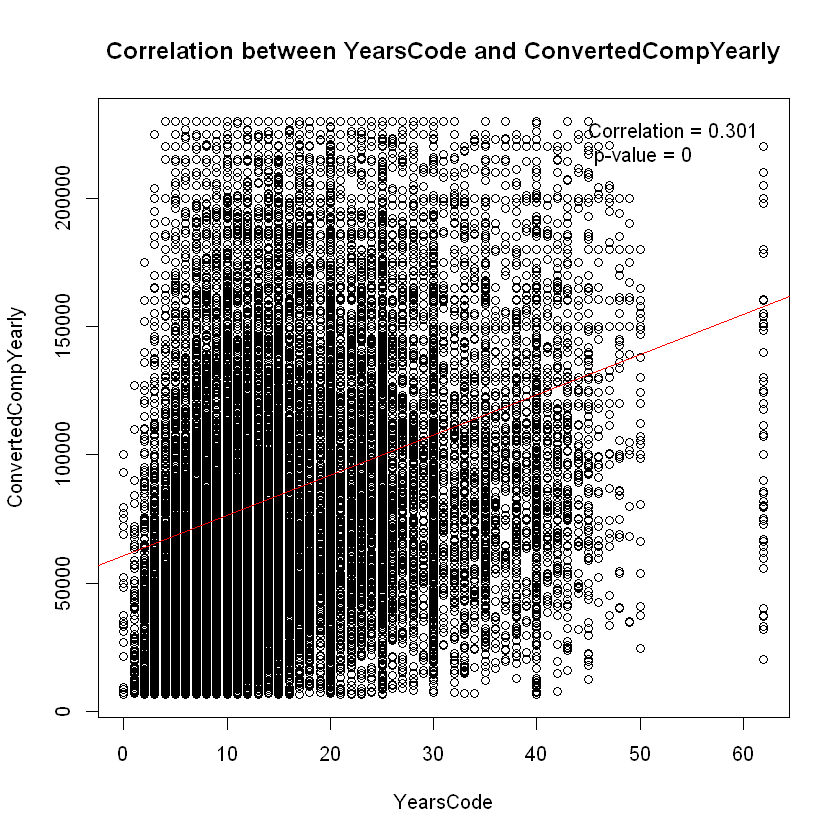

In [11]:
perform_cor_test_plot("YearsCode")

Column: YearsCodePro 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = 66.919, df = 40577, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3064785 0.3240039
sample estimates:
      cor 
0.3152681 




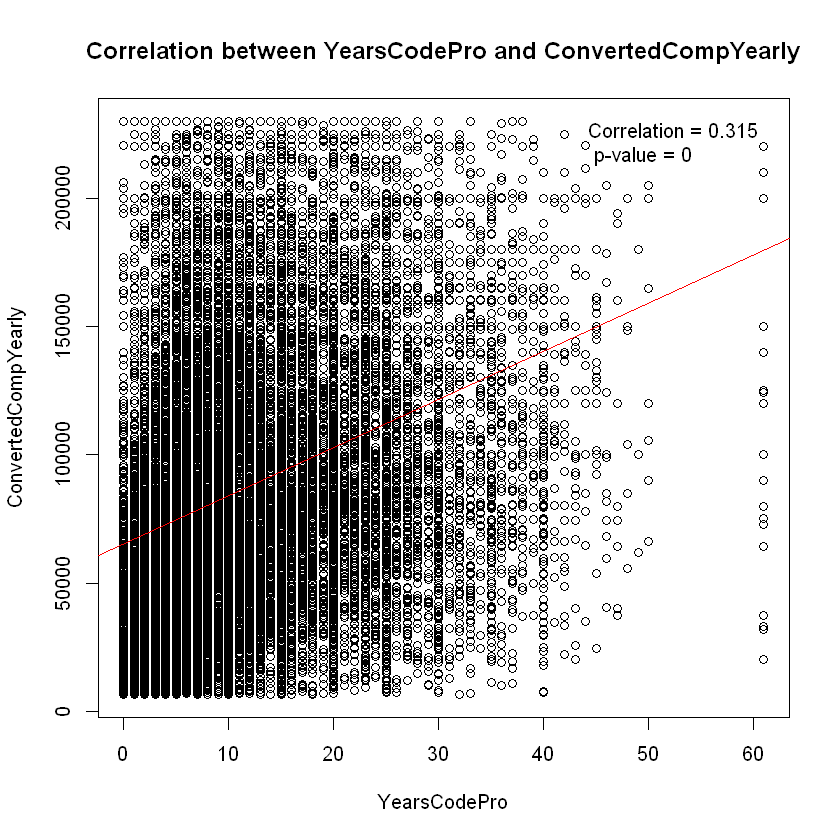

In [12]:
perform_cor_test_plot("YearsCodePro")

In [13]:
perform_anova_tukey("DevType")

ANOVA results:
               Df    Sum Sq   Mean Sq F value Pr(>F)    
DevType        31 3.716e+12 1.199e+11   48.47 <2e-16 ***
Residuals   40547 1.003e+14 2.473e+09                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Performing Tukey's HSD test...
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = formula, data = data)

$DevType
                                                                                                    diff
Blockchain-Academic researcher                                                               38183.00155
Cloud infrastructure engineer-Academic researcher                                            45400.63859
Data or business analyst-Academic researcher                                                  8934.48919
Data scientist or machine learning specialist-Academic researcher                            26203.02076
Database administrator-Academic researcher                     

In [14]:
perform_anova_tukey("OrgSize")

ANOVA results:
               Df    Sum Sq   Mean Sq F value Pr(>F)    
OrgSize         8 3.733e+12 4.666e+11   188.8 <2e-16 ***
Residuals   40570 1.003e+14 2.471e+09                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Performing Tukey's HSD test...
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = formula, data = data)

$OrgSize
                                                                                   diff
10 to 19 employees-1,000 to 4,999 employees                                 -17471.0943
10,000 or more employees-1,000 to 4,999 employees                            14133.8581
100 to 499 employees-1,000 to 4,999 employees                                -2201.3029
2 to 9 employees-1,000 to 4,999 employees                                   -18659.4490
20 to 99 employees-1,000 to 4,999 employees                                 -10723.9403
5,000 to 9,999 employees-1,000 to 4,999 employees           

In [15]:
perform_anova_tukey("PurchaseInfluence")

ANOVA results:
                     Df    Sum Sq   Mean Sq F value Pr(>F)    
PurchaseInfluence     2 8.121e+11 4.061e+11   159.7 <2e-16 ***
Residuals         40576 1.032e+14 2.543e+09                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Performing Tukey's HSD test...
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = formula, data = data)

$PurchaseInfluence
                                                                     diff
I have little or no influence-I have a great deal of influence -11551.749
I have some influence-I have a great deal of influence          -4357.835
I have some influence-I have little or no influence              7193.914
                                                                      lwr
I have little or no influence-I have a great deal of influence -13141.282
I have some influence-I have a great deal of influence          -5894.776
I have some influence-I have little or no 

In [16]:
cor.test(target, data$WorkExp, na.action = na.omit)


	Pearson's product-moment correlation

data:  target and data$WorkExp
t = 66.266, df = 40577, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3036868 0.3212461
sample estimates:
      cor 
0.3124932 


Column: LanguageHaveWorkedWith_avg_popularity_score 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = -12.108, df = 40577, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.06968791 -0.05029854
sample estimates:
        cor 
-0.05999889 




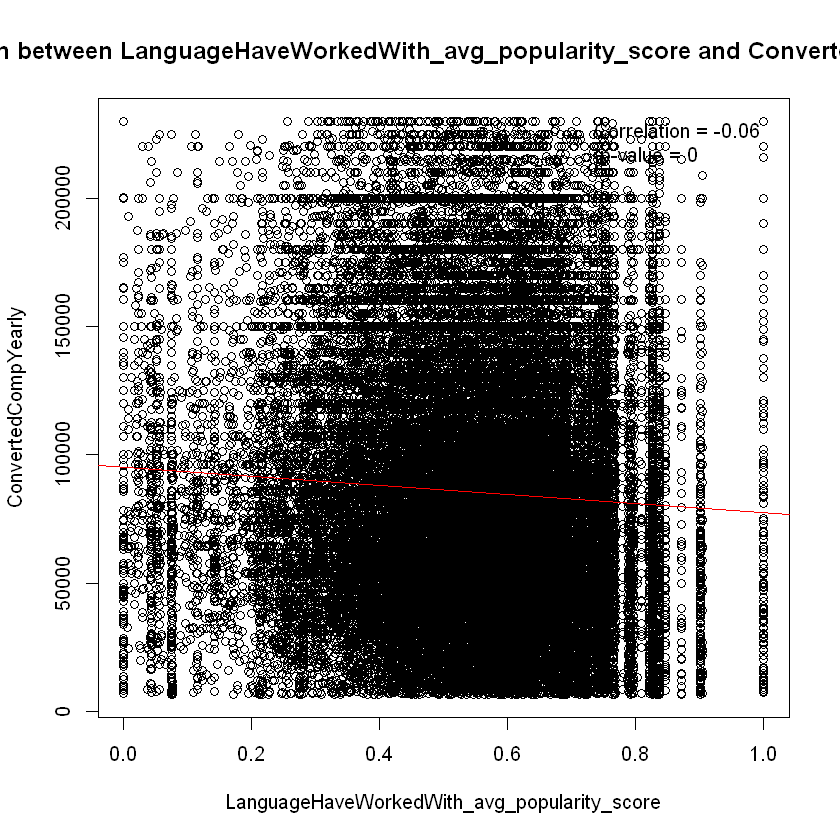

Column: DatabaseHaveWorkedWith_item_count 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = -2.1571, df = 40577, p-value = 0.031
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.020435488 -0.000978305
sample estimates:
        cor 
-0.01070791 




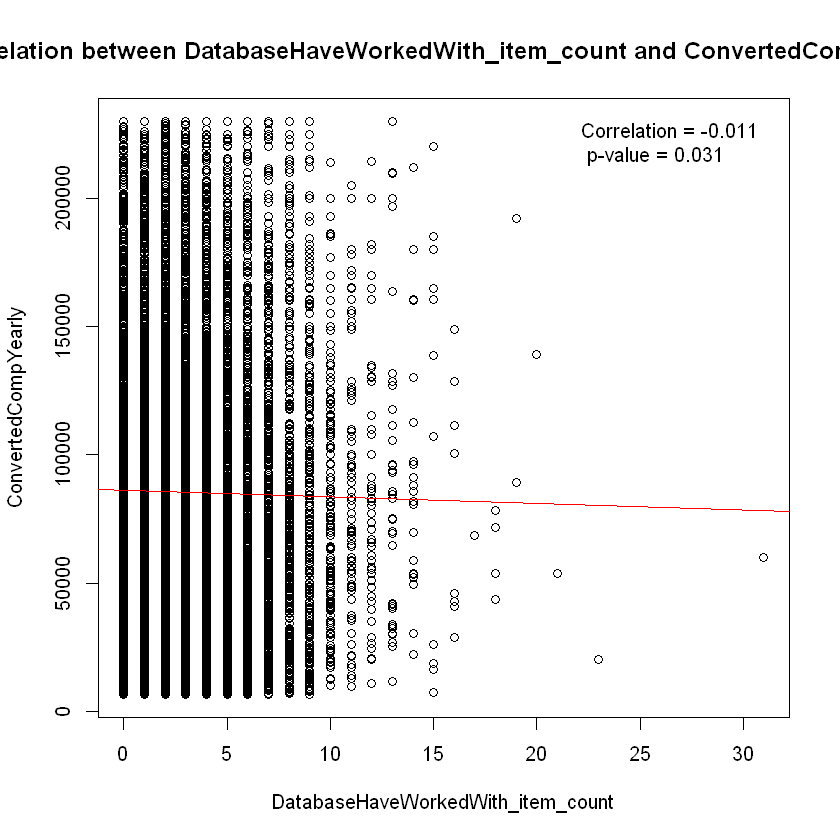

Column: DatabaseHaveWorkedWith_popularity_score 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = -5.6521, df = 40577, p-value = 1.595e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.0377674 -0.0183233
sample estimates:
      cor 
-0.028048 




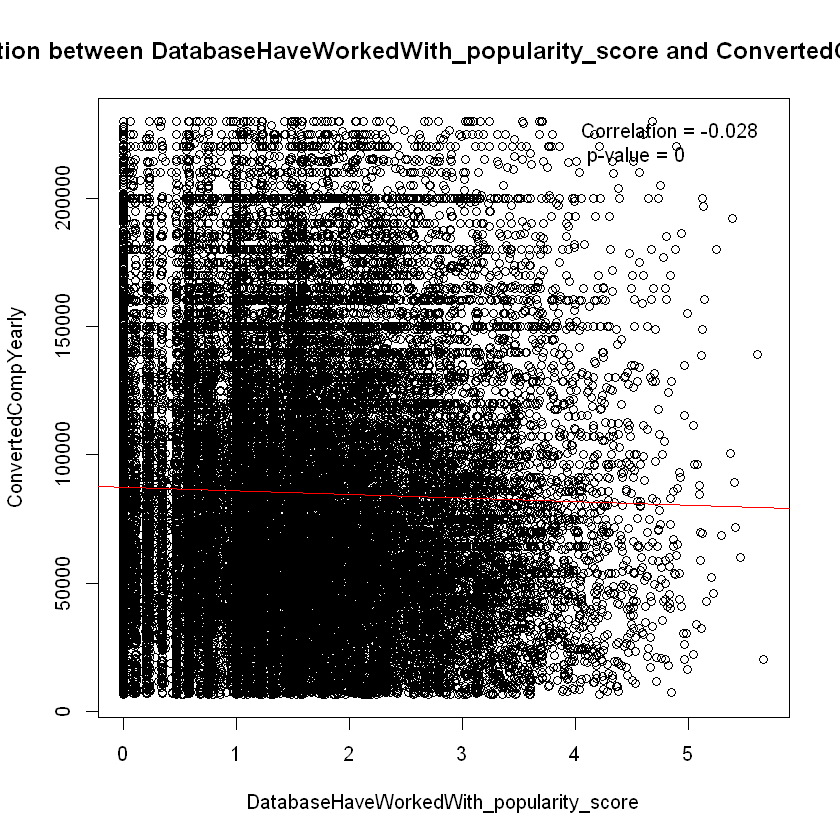

Column: DatabaseHaveWorkedWith_avg_popularity_score 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = -5.5644, df = 40577, p-value = 2.647e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03733263 -0.01788805
sample estimates:
        cor 
-0.02761295 




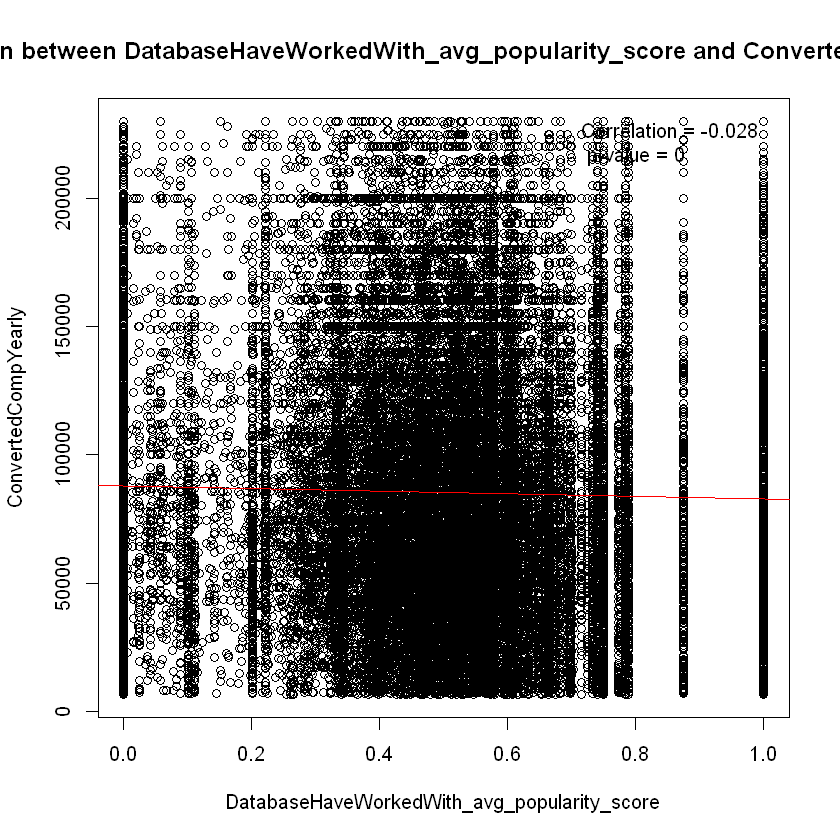

Column: PlatformHaveWorkedWith_item_count 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = 9.4916, df = 40577, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.03735469 0.05677100
sample estimates:
       cor 
0.04706729 




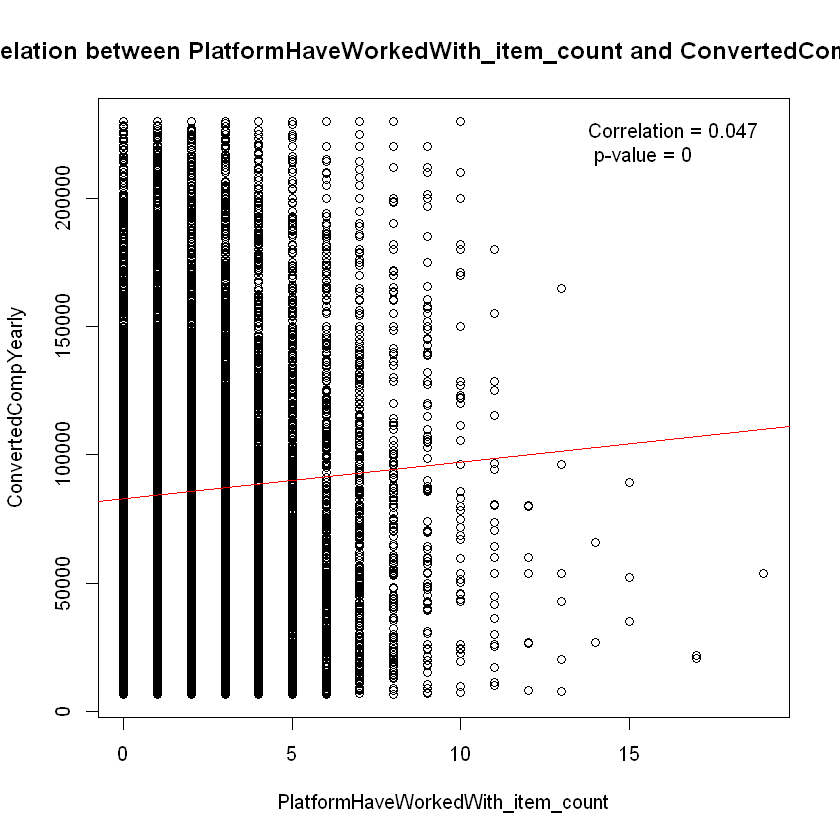

Column: PlatformHaveWorkedWith_popularity_score 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = 26.999, df = 40577, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1232723 0.1423884
sample estimates:
      cor 
0.1328427 




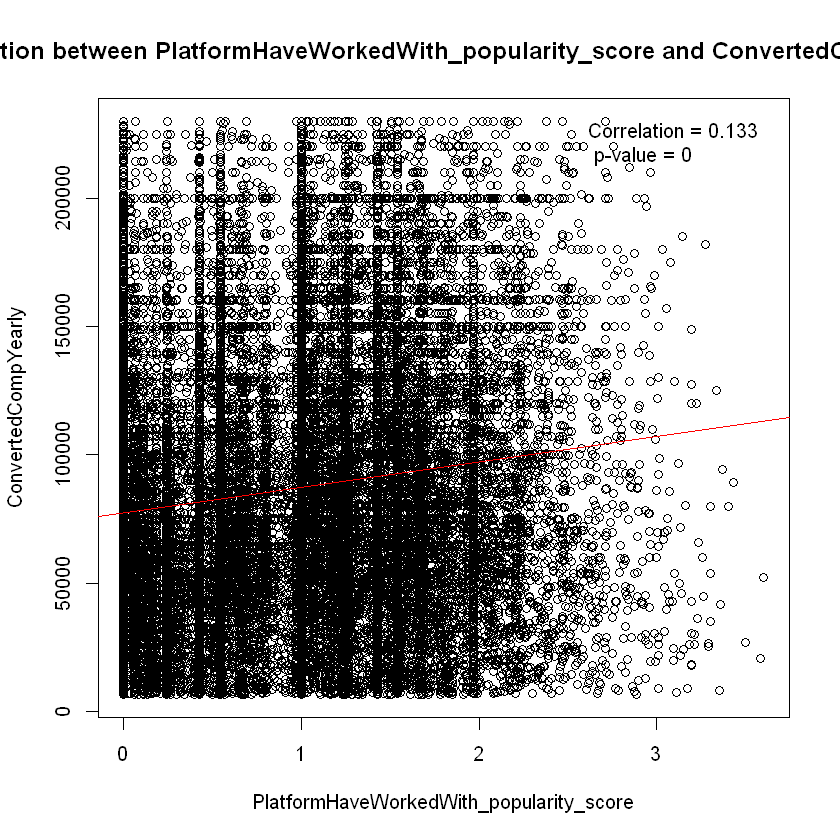

Column: PlatformHaveWorkedWith_avg_popularity_score 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = 33.849, df = 40577, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1562357 0.1751607
sample estimates:
      cor 
0.1657135 




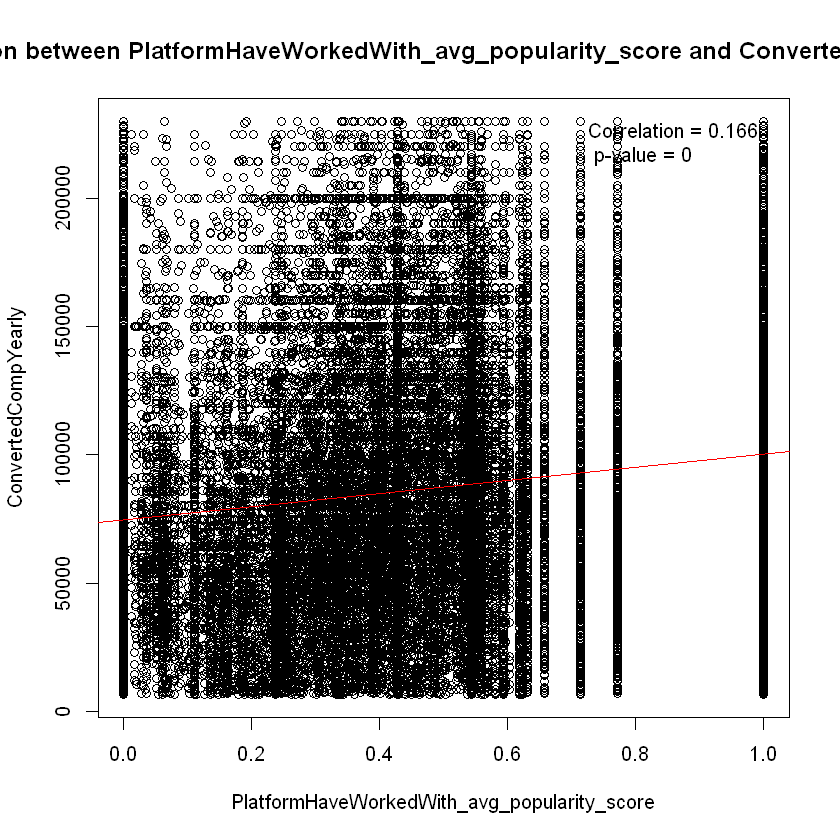

Column: WebframeHaveWorkedWith_item_count 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = -11.723, df = 40577, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.06779094 -0.04839721
sample estimates:
        cor 
-0.05809956 




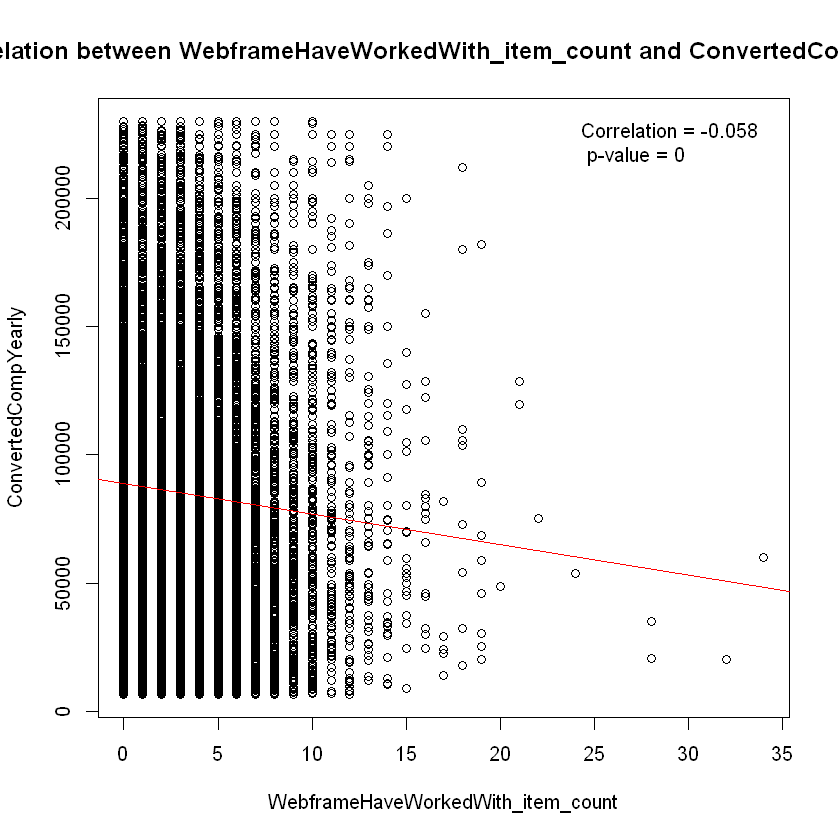

Column: WebframeHaveWorkedWith_popularity_score 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = -7.9288, df = 40577, p-value = 2.269e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04904155 -0.02961223
sample estimates:
        cor 
-0.03933061 




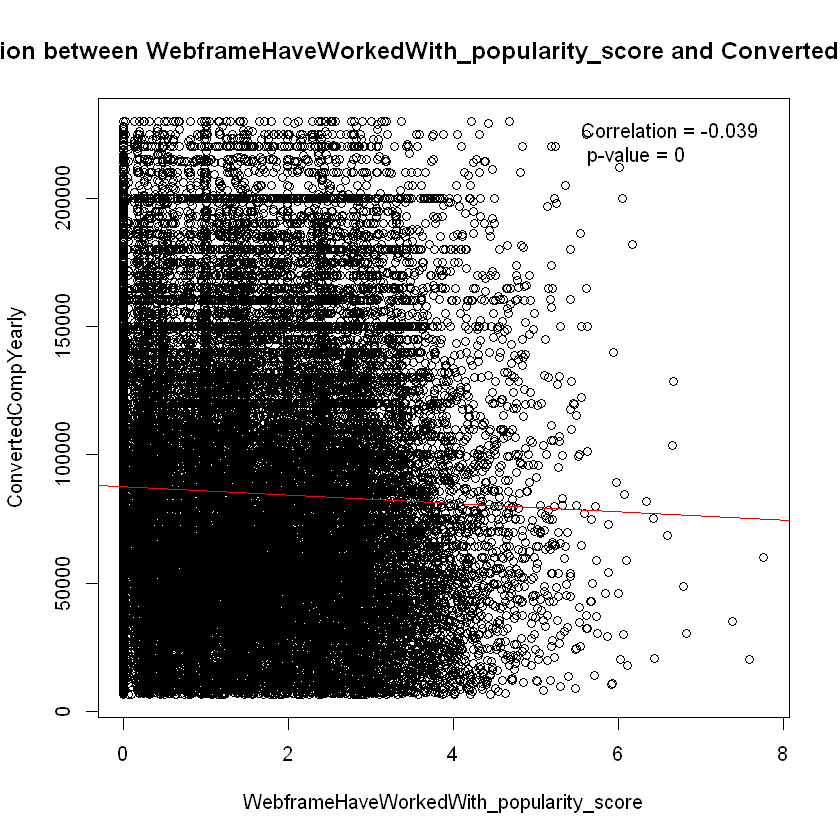

Column: WebframeHaveWorkedWith_avg_popularity_score 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = 0.31, df = 40577, p-value = 0.7566
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.008190874  0.011268495
sample estimates:
        cor 
0.001538956 




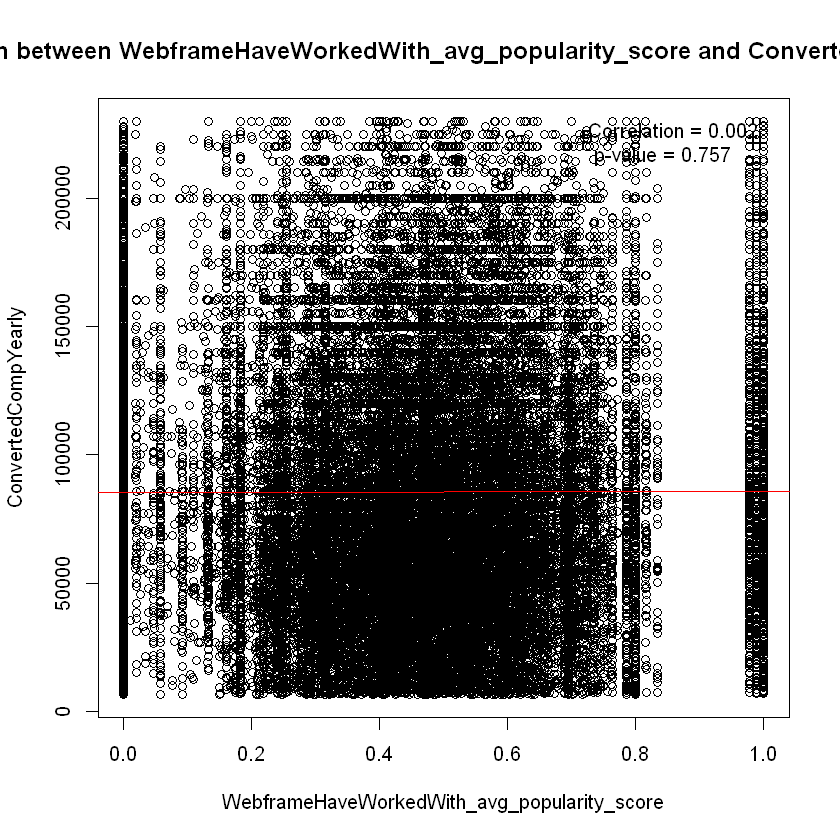

Column: MiscTechHaveWorkedWith_item_count 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = -3.8903, df = 40577, p-value = 0.0001003
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.029033199 -0.009581039
sample estimates:
        cor 
-0.01930895 




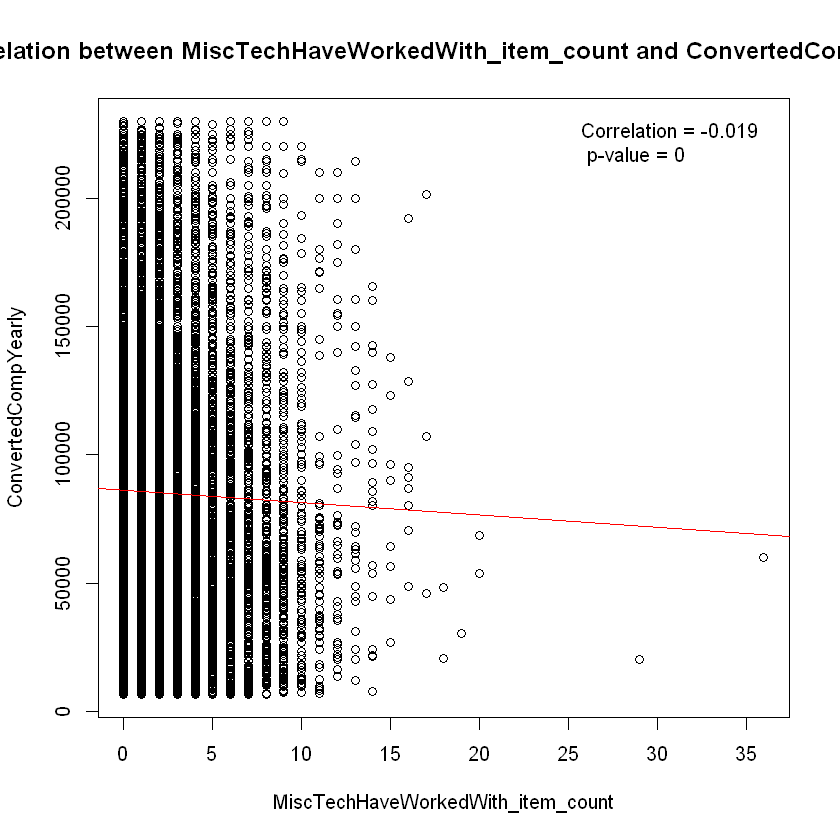

Column: MiscTechHaveWorkedWith_popularity_score 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = -1.2747, df = 40577, p-value = 0.2024
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.016056754  0.003401881
sample estimates:
         cor 
-0.006328035 




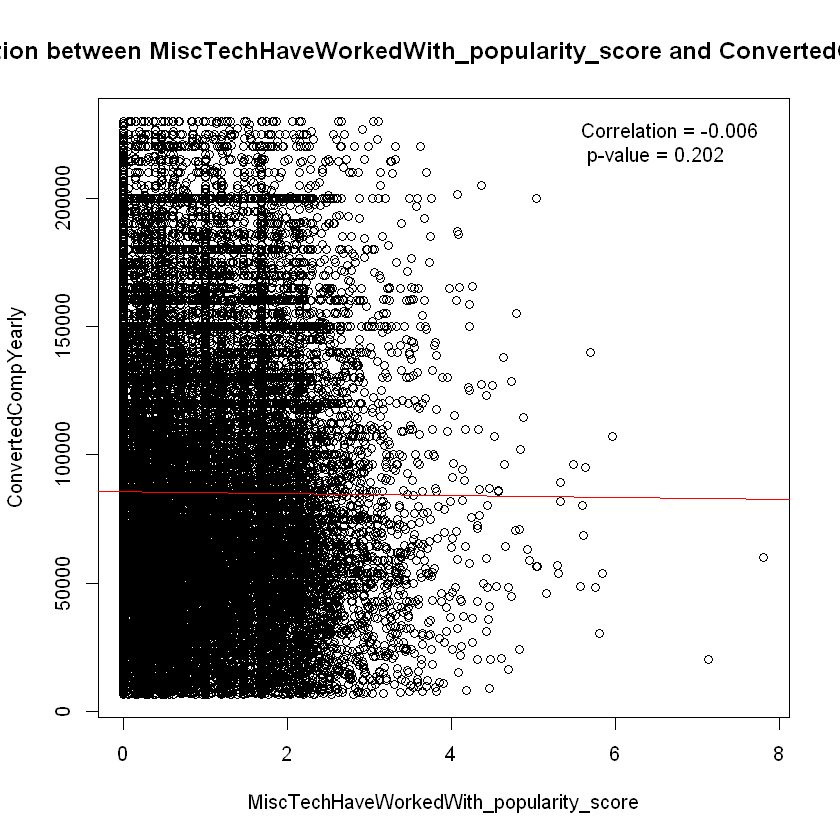

Column: MiscTechHaveWorkedWith_avg_popularity_score 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = 2.1957, df = 40577, p-value = 0.02812
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.001169994 0.020627097
sample estimates:
       cor 
0.01089958 




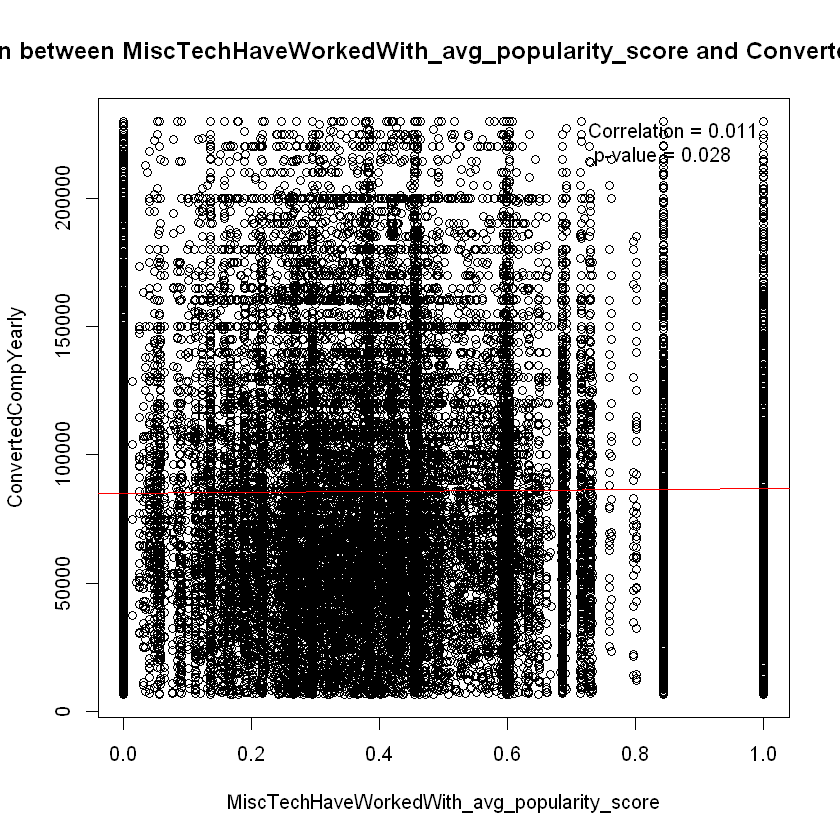

Column: ToolsTechHaveWorkedWith_item_count 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = 21.06, df = 40577, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.0943455 0.1135945
sample estimates:
      cor 
0.1039798 




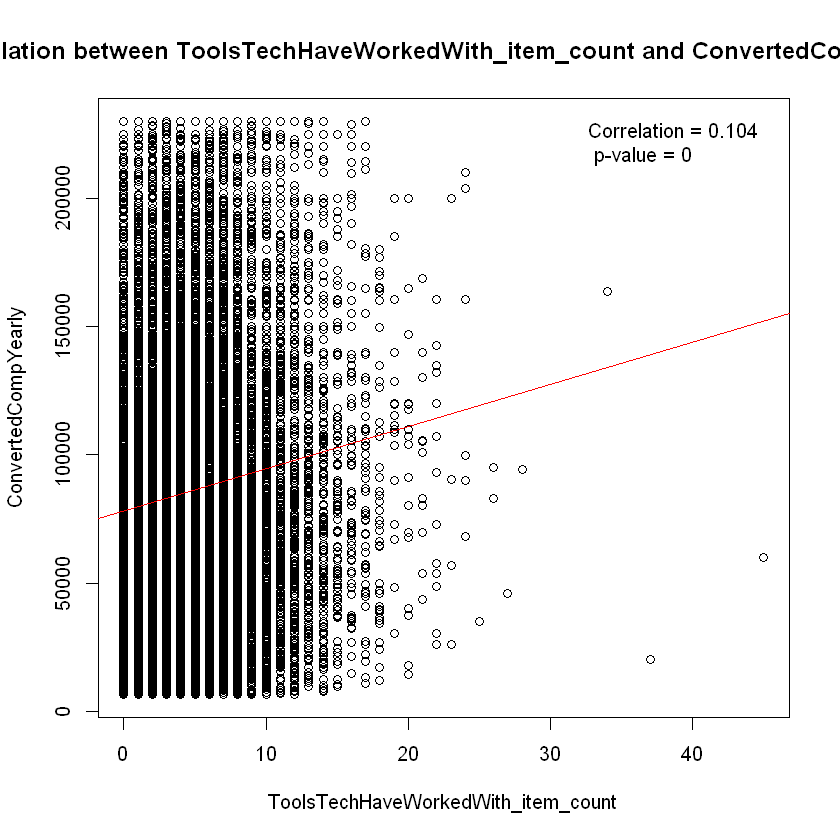

Column: ToolsTechHaveWorkedWith_popularity_score 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = 20.767, df = 40577, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.09291258 0.11216737
sample estimates:
      cor 
0.1025496 




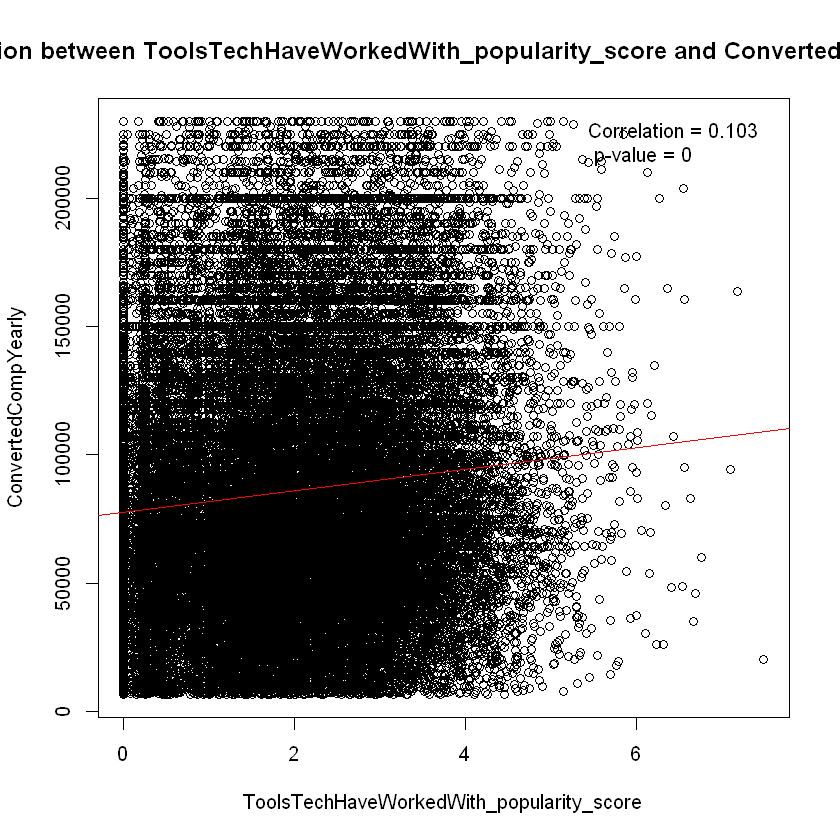

Column: ToolsTechHaveWorkedWith_avg_popularity_score 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = 0.28792, df = 40577, p-value = 0.7734
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.008300494  0.011158881
sample estimates:
        cor 
0.001429329 




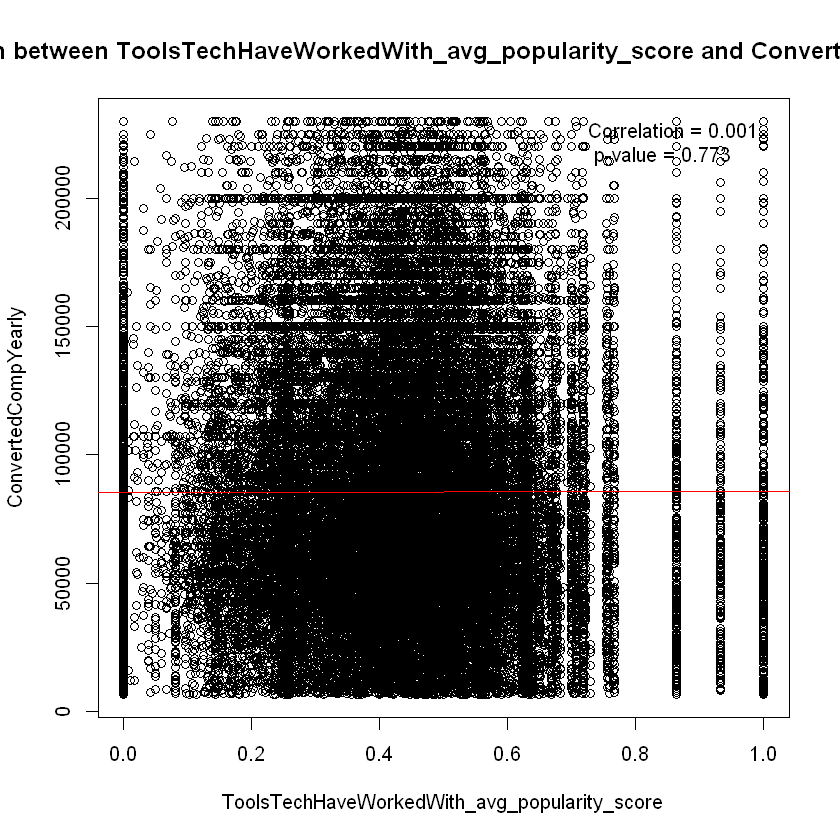

Column: NEWCollabToolsHaveWorkedWith_item_count 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = -7.3549, df = 40577, p-value = 1.947e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04620100 -0.02676749
sample estimates:
       cor 
-0.0364877 




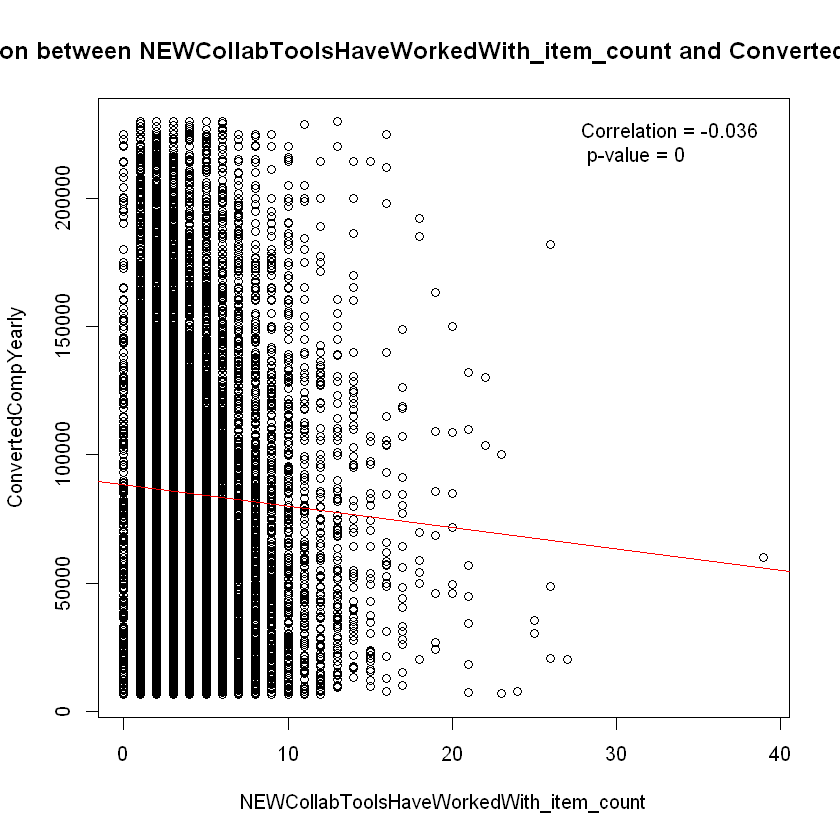

Column: NEWCollabToolsHaveWorkedWith_popularity_score 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = -8.5406, df = 40577, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.05206873 -0.03264423
sample estimates:
        cor 
-0.04236048 




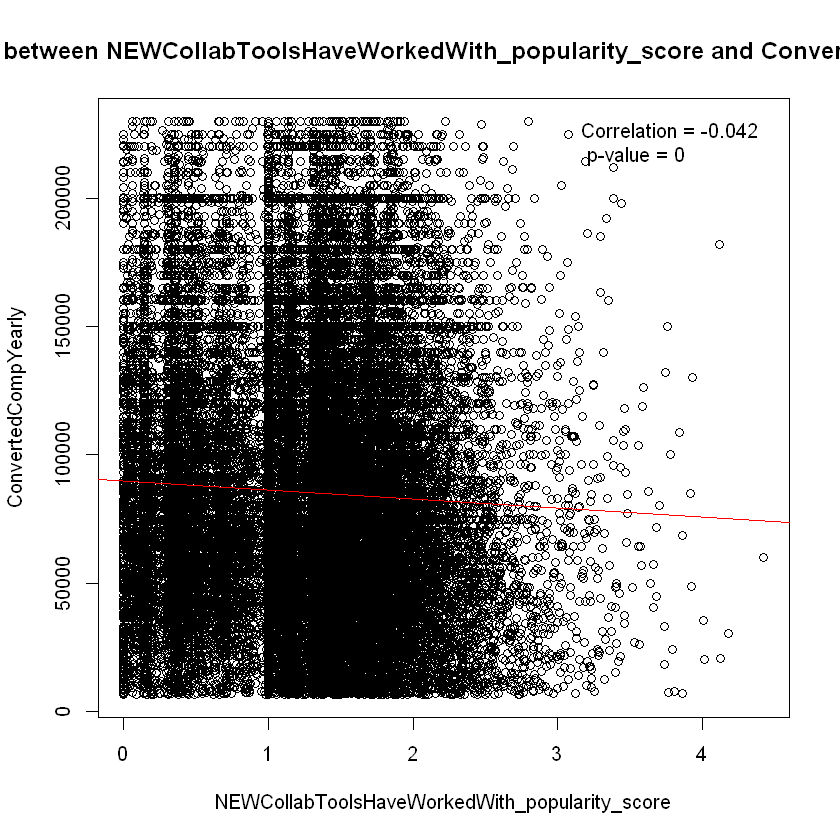

Column: NEWCollabToolsHaveWorkedWith_avg_popularity_score 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = -2.321, df = 40577, p-value = 0.02029
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.021248756 -0.001791925
sample estimates:
        cor 
-0.01152143 




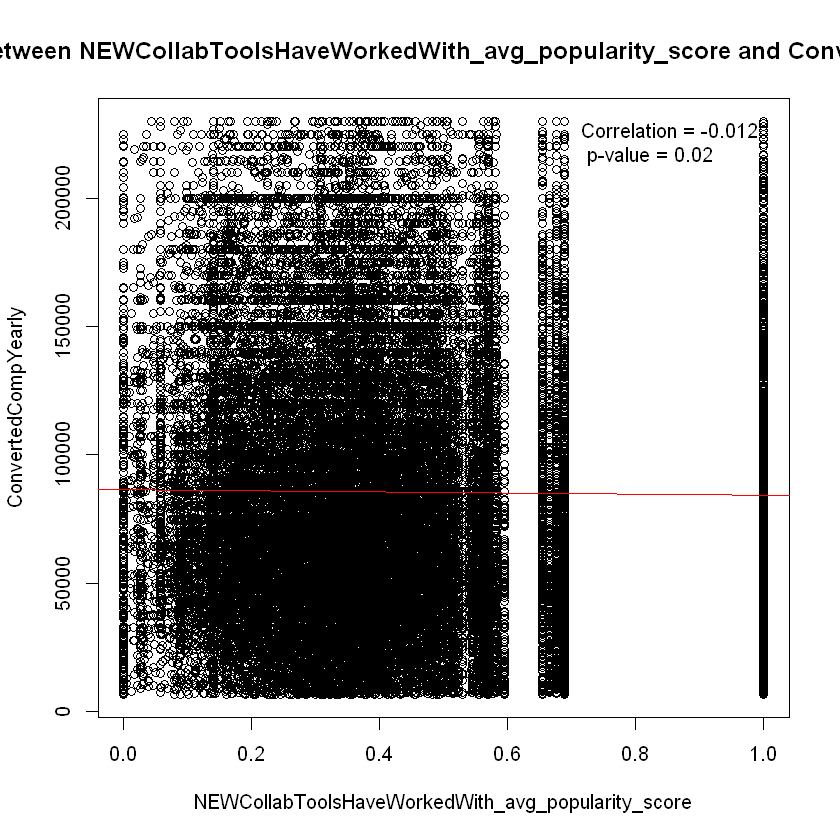

Column: OfficeStackAsyncHaveWorkedWith_item_count 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = 22.968, df = 40577, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1036721 0.1228818
sample estimates:
      cor 
0.1132875 




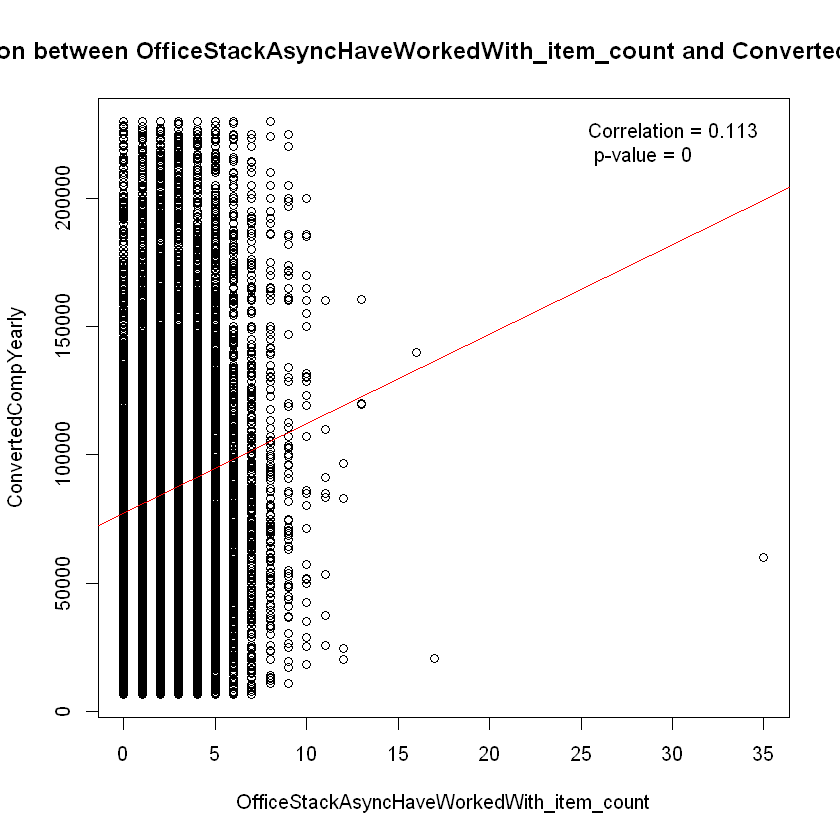

Column: OfficeStackAsyncHaveWorkedWith_popularity_score 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = 26.076, df = 40577, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1187982 0.1379369
sample estimates:
      cor 
0.1283795 




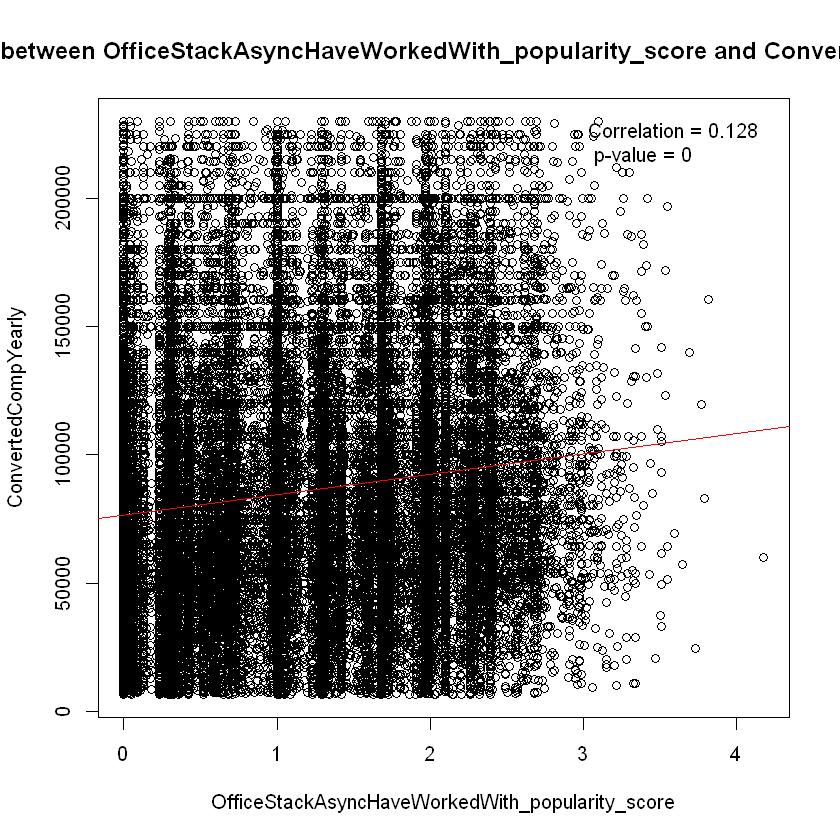

Column: OfficeStackAsyncHaveWorkedWith_avg_popularity_score 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = 14.448, df = 40577, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.06185565 0.08121547
sample estimates:
      cor 
0.0715423 




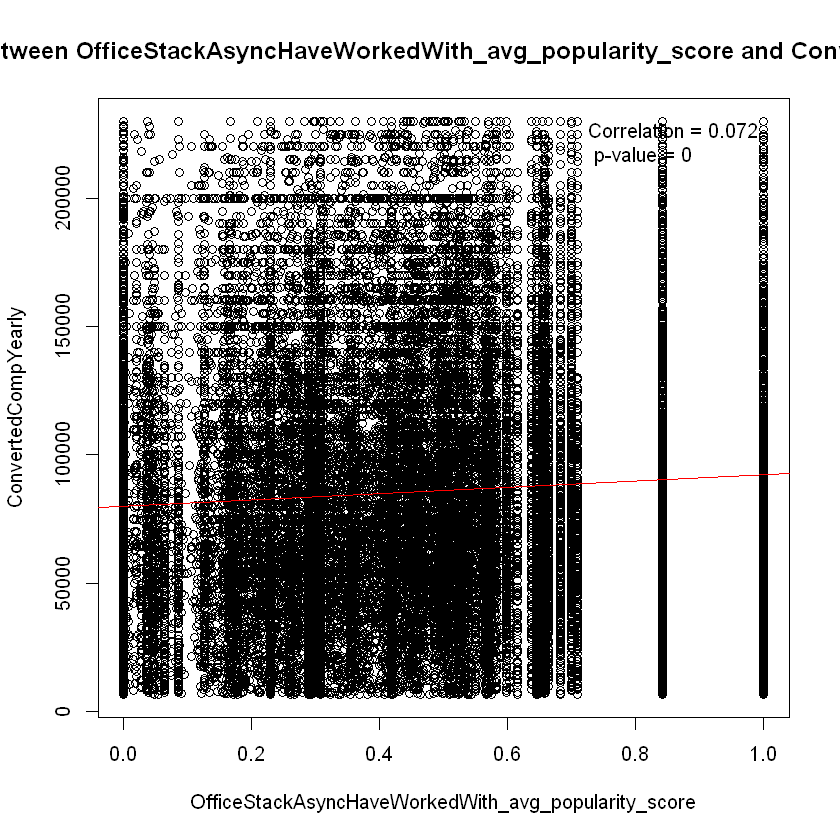

Column: OfficeStackSyncHaveWorkedWith_item_count 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = 3.4642, df = 40577, p-value = 0.0005325
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.007466171 0.026919833
sample estimates:
       cor 
0.01719463 




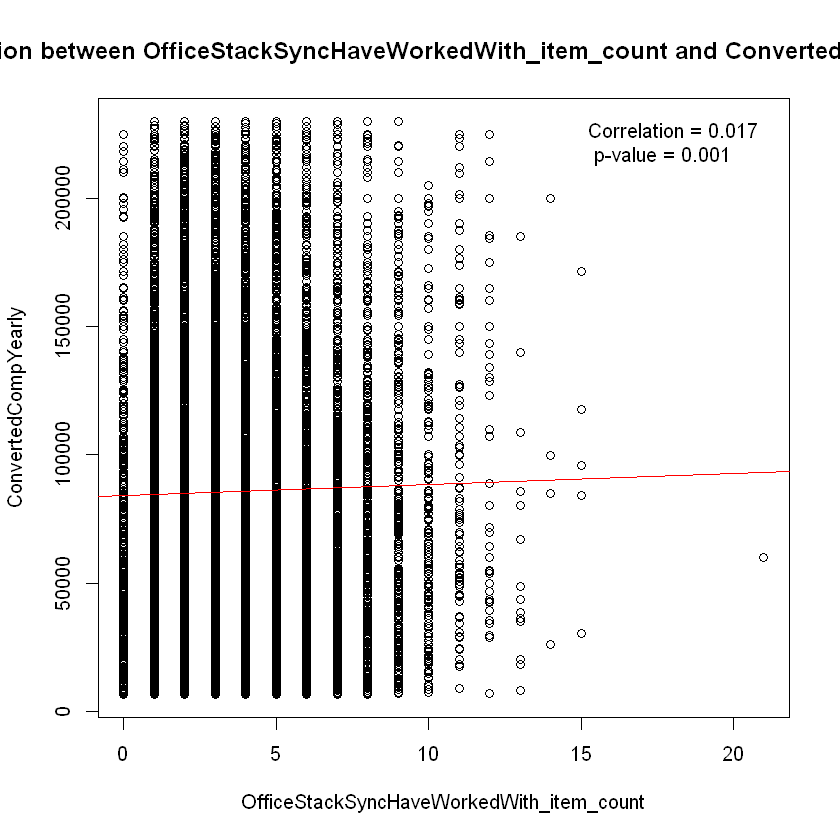

Column: OfficeStackSyncHaveWorkedWith_popularity_score 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = 16.121, df = 40577, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.07009938 0.08943497
sample estimates:
       cor 
0.07977468 




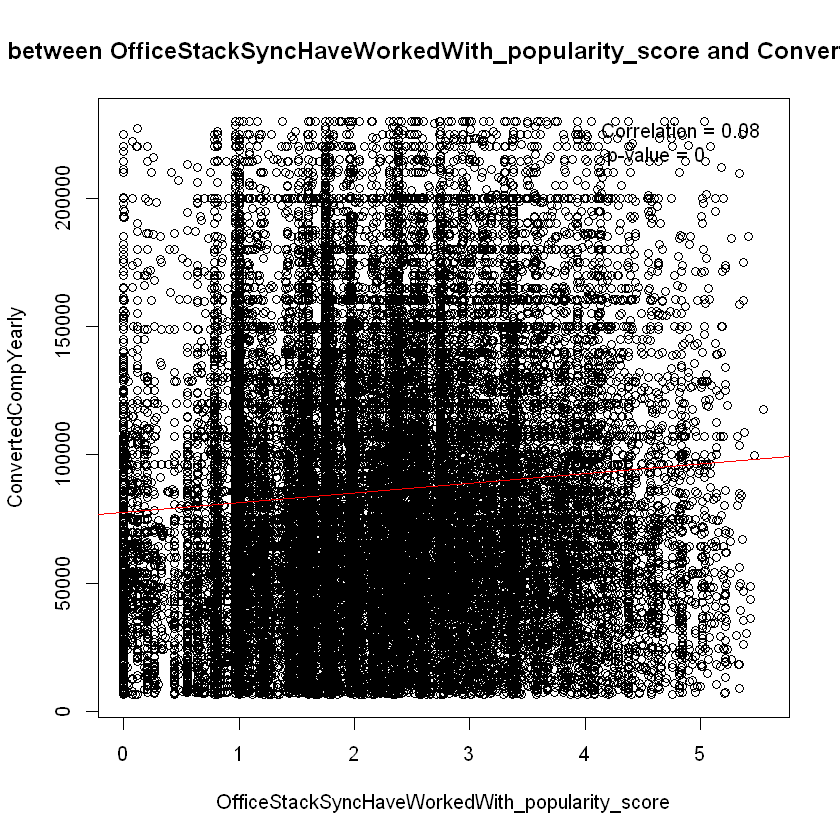

Column: OfficeStackSyncHaveWorkedWith_avg_popularity_score 

	Pearson's product-moment correlation

data:  target and data[[col_var]]
t = 22.115, df = 40577, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.09950782 0.11873550
sample estimates:
      cor 
0.1091319 




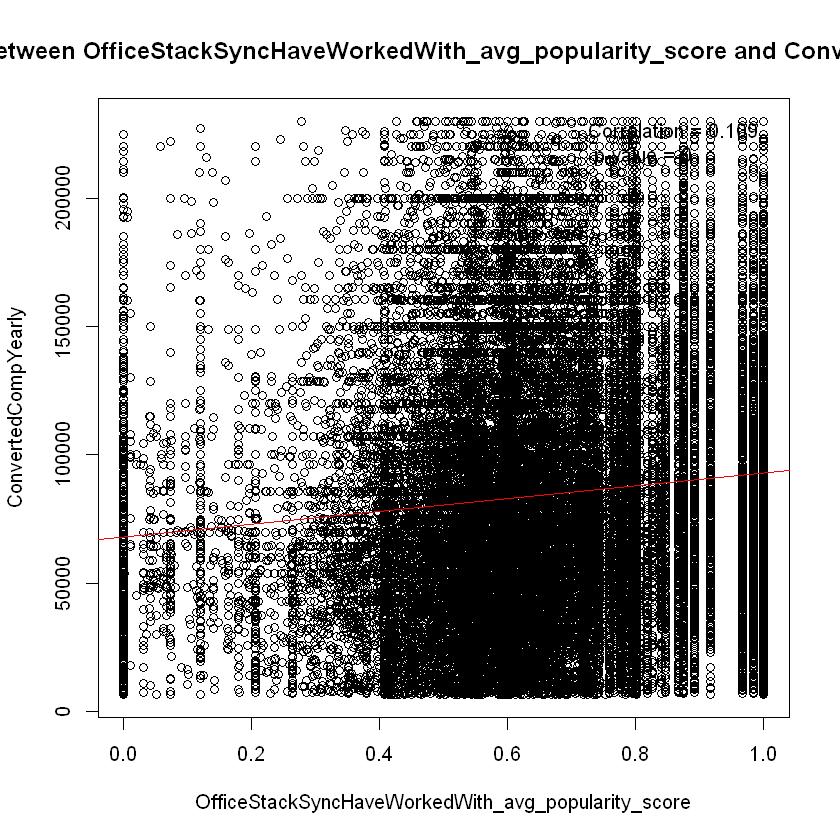

In [17]:
num_cols <- ncol(data)

for (i in 15:num_cols) {
  col_name <- names(data)[i]
  perform_cor_test_plot(col_name)
}